<a href="https://colab.research.google.com/github/sztyberj/VisibleSpectrum-DataVisualization/blob/main/Visible_Spectrum_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visible Spectrum - Data Visualization

Creation date Nov 2021

**The visible spectrum is the portion of the electromagnetic spectrum that is visible to the human eye. Electromagnetic radiation in this range of wavelengths is called visible light or simply light.**
https://en.wikipedia.org/wiki/Visible_spectrum

Definitions:

**Hertz (Hz)** – unit of frequency in the International System of Units (SI) and is defined as one cycle per second. For frequency of visible spectrum i used 10^14 Hz.

**Nanometre (nm)** –  unit of length in the metric system, equal to one billionth (short scale) of a metre (0.000000001 m).

**Electronvolt (eV)** – measure of an amount of kinetic energy gained by a single electron accelerating from rest through an electric potential difference of one volt in vacuum.

**Import libs and get data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Get data from GitHub
url = 'https://raw.githubusercontent.com/sztyberj/VisibleSpectrum-DataVisualization/main/colors.txt'
data = pd.read_csv(url, header = None)
data.columns = ["Name","Hz","nm","eV", "Hex"]
rows = len(data.index)

data

,Name,Hz,nm,eV,Hex
0,Red(limit),4.29,700,1.77,#d92121
1,Red,4.62,650,1.91,#ff0000
2,Orange,5.00,600,2.06,#ffa500
3,Yellow,5.16,580,2.14,#ffff00
4,Green,5.45,550,2.25,#378805
5,Cyan,5.99,500,2.48,#00ffff
6,Blue,6.66,450,2.75,#0000ff
7,Violet(limit),7.50,400,3.10,#972188


**Scatter plot showing frequency and wavelength**

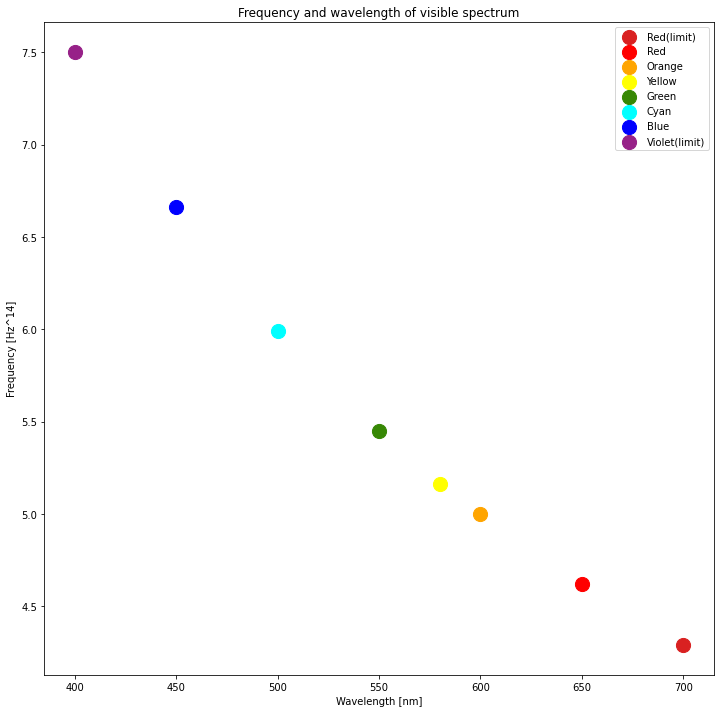

In [ ]:
#Create plots
s1 = 200
names = []

#Iteration for each scatter
for i in range(rows):
  plt.scatter(data.nm[i], data.Hz[i], s1, color = data.Hex[i])

  #List is required for data correctness
  names.append(data.Name[i])
plt.legend(names)

#Plot config
plt.xlabel("Wavelength [nm]")
plt.ylabel("Frequency [Hz^14]")
plt.title("Frequency and wavelength of visible spectrum", loc='center')
plt.rcParams["figure.figsize"] = (12,12)

plt.show()

**Frequency as a sine wave for each color**

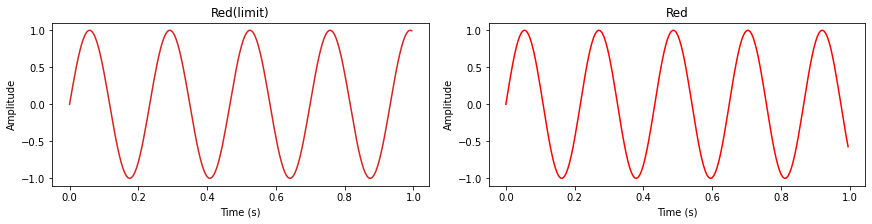

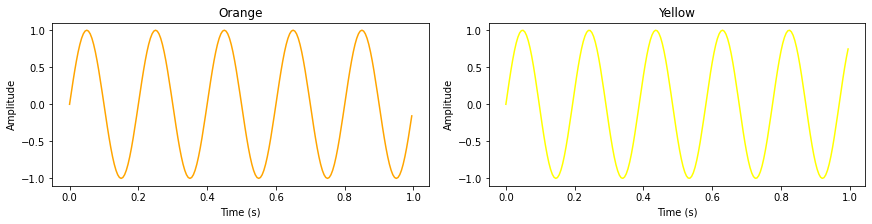

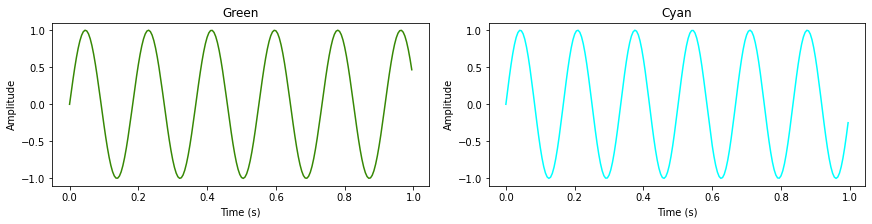

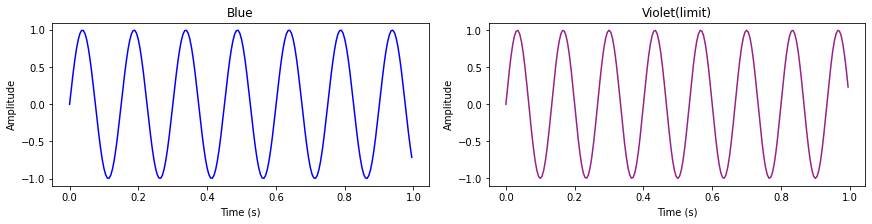

In [ ]:
#Sampling rate
sr = 200.0
#Sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

#Loop for subplots
for x in range(0, rows, 2):
  fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12,3))

  #First subplot config
  freq1 = data.Hz[x]
  y1 = np.sin(2*np.pi*freq1*t)

  axs[0].plot(t, y1, color = data.Hex[x])
  axs[0].set_title(data.Name[x])
  axs[0].set_xlabel('Time (s)')
  axs[0].set_ylabel('Amplitude')
 
  #Second subplot config
  freq2 = data.Hz[x+1]
  y2 = np.sin(2*np.pi*freq2*t)

  axs[1].plot(t, y2, color = data.Hex[x+1])
  axs[1].set_title(data.Name[x+1])
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('Amplitude')


  plt.show()

**Barplot of Photon energy (eV) for each color.**

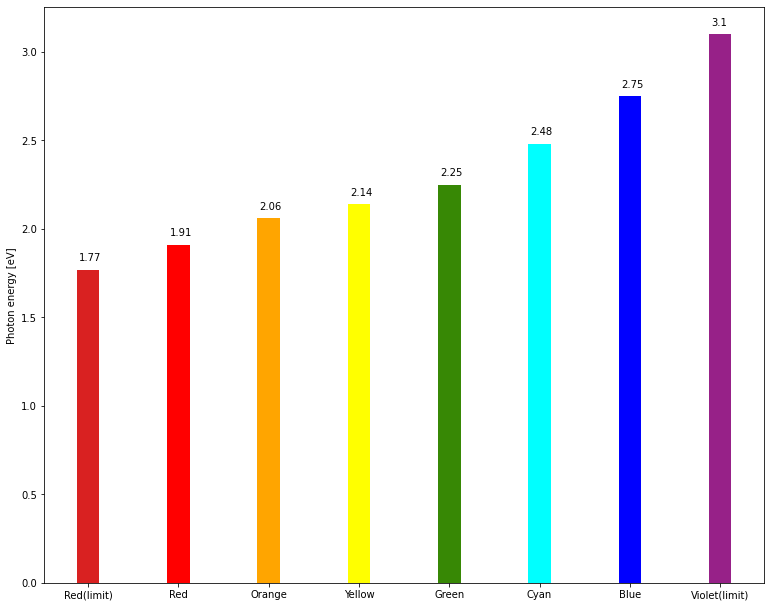

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])

ax.bar(np.arange(rows) , data.eV, color = data.Hex, width = 0.25)
ax.set_ylabel("Photon energy [eV]")
ax.set_xticks(range(len(data.Name)))
ax.set_xticklabels(data.Name);

#Add values on top bars
for i in range(len(data.index)):
    ax.text(i - .10, data.eV[i] + .05 , str(data.eV[i]))